# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Pandas Installation](#pandas-installation)  
    * [Pandas Usage](#pandas-usage)  
        * [Pandas Object Creation](#pandas-object-creation)  
        * [Pandas Viewing Data](#pandas-viewing-data)  
        * [Pandas Selection](#pandas-selection)  
        * [Pandas Missing Data](#pandas-missing-data)  
        * [Pandas Operations](#pandas-operations)  
        * [Pandas Merge](#pandas-merge)  
        * [Pandas Grouping](#pandas-grouping)  
        * [Pandas Reshaping](#pandas-reshaping)
        * [Pandas Categoricals](#pandas-categoricals)
        * [Pandas Plotting](#pandas-plotting)
* [Numpy](#numpy)  
    * [Numpy Installation](#numpy-installation)  
    * [Numpy Usage](#numpy-usage)  
* [Matplotlib](#matplotlib)
    * [Matplotlib Installation](#matplotlib-installation)  
    * [Matplotlib Usage](#matplotlib-usage)
* [Plotly](#plotly)
    * [Plotly Installation](#plotly-installation)  
    * [Plotly Usage](#plotly-usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Pandas Installation

In [1]:
!pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

#### Pandas Object Creation  

[Back to contents](#table-of-contents)

In [2]:
import pandas as pd
import numpy as np

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504
2013-01-03,1.651291,-0.889373,0.692408,-0.811214
2013-01-04,2.641964,0.215857,0.024025,-0.831985
2013-01-05,0.866219,-0.466926,0.644702,1.596362
2013-01-06,-0.500277,0.068581,-0.000060,-0.307715


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Pandas Viewing Data

[Back to contents](#table-of-contents)

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504
2013-01-03,1.651291,-0.889373,0.692408,-0.811214
2013-01-04,2.641964,0.215857,0.024025,-0.831985
2013-01-05,0.866219,-0.466926,0.644702,1.596362


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504
2013-01-03,1.651291,-0.889373,0.692408,-0.811214
2013-01-04,2.641964,0.215857,0.024025,-0.831985
2013-01-05,0.866219,-0.466926,0.644702,1.596362
2013-01-06,-0.500277,0.068581,-0.000060,-0.307715


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[ 1.55859590e+00, -6.84653344e-01, -2.46424852e-01,
        -4.14602103e-01],
       [-1.05918690e+00, -8.41124921e-01, -6.04877981e-01,
        -1.40250374e+00],
       [ 1.65129085e+00, -8.89373043e-01,  6.92407668e-01,
        -8.11213864e-01],
       [ 2.64196414e+00,  2.15857021e-01,  2.40245620e-02,
        -8.31985326e-01],
       [ 8.66218993e-01, -4.66925707e-01,  6.44701912e-01,
         1.59636202e+00],
       [-5.00277044e-01,  6.85808668e-02, -5.95729634e-05,
        -3.07715353e-01]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.859768,-0.432940,0.084962,-0.361943
std,1.401659,0.471576,0.505754,1.034043
min,-1.059187,-0.889373,-0.604878,-1.402504
25%,-0.158653,-0.802007,-0.184834,-0.826792
50%,1.212407,-0.575790,0.011982,-0.612908
75%,1.628117,-0.065296,0.489533,-0.334437
max,2.641964,0.215857,0.692408,1.596362


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.558596,-1.059187,1.651291,2.641964,0.866219,-0.500277
B,-0.684653,-0.841125,-0.889373,0.215857,-0.466926,0.068581
C,-0.246425,-0.604878,0.692408,0.024025,0.644702,-0.000060
D,-0.414602,-1.402504,-0.811214,-0.831985,1.596362,-0.307715


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.414602,-0.246425,-0.684653,1.558596
2013-01-02,-1.402504,-0.604878,-0.841125,-1.059187
2013-01-03,-0.811214,0.692408,-0.889373,1.651291
2013-01-04,-0.831985,0.024025,0.215857,2.641964
2013-01-05,1.596362,0.644702,-0.466926,0.866219
2013-01-06,-0.307715,-0.000060,0.068581,-0.500277


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-03,1.651291,-0.889373,0.692408,-0.811214
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602
2013-01-05,0.866219,-0.466926,0.644702,1.596362
2013-01-06,-0.500277,0.068581,-0.000060,-0.307715
2013-01-04,2.641964,0.215857,0.024025,-0.831985


#### Pandas Selection

[Back to contents](#table-of-contents)

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01    1.558596
2013-01-02   -1.059187
2013-01-03    1.651291
2013-01-04    2.641964
2013-01-05    0.866219
2013-01-06   -0.500277
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,2.641964,0.215857,0.024025,-0.831985
2013-01-05,0.866219,-0.466926,0.644702,1.596362


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A    1.558596
B   -0.684653
C   -0.246425
D   -0.414602
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,2.641964,0.215857
2013-01-05,0.866219,-0.466926


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.059187,-0.604878
2013-01-03,1.651291,0.692408
2013-01-05,0.866219,0.644702


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

-0.8411249208635948

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602
2013-01-03,1.651291,-0.889373,0.692408,-0.811214
2013-01-04,2.641964,0.215857,0.024025,-0.831985
2013-01-05,0.866219,-0.466926,0.644702,1.596362


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,1.558596,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.651291,NaN,0.692408,NaN
2013-01-04,2.641964,0.215857,0.024025,NaN
2013-01-05,0.866219,NaN,0.644702,1.596362
2013-01-06,NaN,0.068581,NaN,NaN


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.651291,-0.889373,0.692408,-0.811214,two
2013-01-05,0.866219,-0.466926,0.644702,1.596362,four


#### Pandas Missing Data

[Back to contents](#table-of-contents)

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602,NaN
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504,NaN
2013-01-03,1.651291,-0.889373,0.692408,-0.811214,NaN
2013-01-04,2.641964,0.215857,0.024025,-0.831985,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602,1.0
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504,1.0
2013-01-03,1.651291,-0.889373,0.692408,-0.811214,NaN
2013-01-04,2.641964,0.215857,0.024025,-0.831985,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602,1.0
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602,1.0
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504,1.0
2013-01-03,1.651291,-0.889373,0.692408,-0.811214,5.0
2013-01-04,2.641964,0.215857,0.024025,-0.831985,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Pandas Operations

[Back to contents](#table-of-contents)

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A    0.859768
B   -0.432940
C    0.084962
D   -0.361943
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,1.558596,-0.684653,-0.246425,-0.414602,6.072521e-02
2013-01-02,-1.059187,-0.841125,-0.604878,-1.402504,3.658774e-01
2013-01-03,1.651291,-0.889373,0.692408,-0.811214,4.794284e-01
2013-01-04,2.641964,0.215857,0.024025,-0.831985,5.771796e-04
2013-01-05,0.866219,-0.466926,0.644702,1.596362,4.156406e-01
2013-01-06,-0.500277,0.068581,-0.000060,-0.307715,3.548938e-09


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Pandas Merge

[Back to contents](#table-of-contents)

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.794427,0.230367,1.411661,1.454714
1,0.657194,0.838526,0.251380,1.162646
2,-0.991792,-0.398243,-0.548427,0.858876
3,-0.961703,0.956674,0.411820,-0.093385
4,-1.306623,0.763773,1.431677,-0.967797
5,0.849236,-0.206624,1.574792,1.081965
6,0.281458,0.641465,-1.384106,-0.641974
7,-0.402995,-0.837978,-0.444909,0.427374
8,0.487547,0.741764,0.269266,1.079528
9,1.165472,0.529917,0.299558,1.109469


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.794427  0.230367  1.411661  1.454714
 1  0.657194  0.838526  0.251380  1.162646
 2 -0.991792 -0.398243 -0.548427  0.858876,
           0         1         2         3
 3 -0.961703  0.956674  0.411820 -0.093385
 4 -1.306623  0.763773  1.431677 -0.967797
 5  0.849236 -0.206624  1.574792  1.081965
 6  0.281458  0.641465 -1.384106 -0.641974,
           0         1         2         3
 7 -0.402995 -0.837978 -0.444909  0.427374
 8  0.487547  0.741764  0.269266  1.079528
 9  1.165472  0.529917  0.299558  1.109469]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Pandas Grouping

[Back to contents](#table-of-contents)

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.697184,0.927783
1,bar,one,1.139443,-0.609572
2,foo,two,0.273686,-0.245462
3,bar,three,-1.128183,-1.316794
4,foo,two,1.326054,0.442977
5,bar,two,-0.294309,-0.513182
6,foo,one,-0.009363,1.032154
7,foo,three,0.088144,2.010072


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,-0.283049,-0.813182
foo,2.375704,0.833505


#### Pandas Reshaping

[Back to contents](#table-of-contents)

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.651791 -1.245066
      two    -2.486591 -0.087211
baz   one     0.253582  0.340576
      two     0.963591 -0.375105
foo   one     0.051932  0.895898
      two    -0.456424  1.138002
qux   one     0.272101 -1.028024
      two     0.320252  0.773342

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.651791
               B   -1.245066
       two     A   -2.486591
               B   -0.087211
baz    one     A    0.253582
               B    0.340576
       two     A    0.963591
               B   -0.375105
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one    -0.651791 -1.245066
      two    -2.486591 -0.087211
baz   one     0.253582  0.340576
      two     0.963591 -0.375105

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A -0.651791 -2.486591
      B -1.245066 -0.087211
baz   A  0.253582  0.963591
      B  0.340576 -0.375105

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.651791  0.253582
       B -1.245066  0.340576
two    A -2.486591  0.963591
       B -0.087211 -0.375105

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.098101,0.177601
1,one,B,foo,0.256466,-1.127082
2,two,C,foo,1.119175,0.243676
3,three,A,bar,-1.049647,1.971477
4,one,B,bar,-0.963873,0.368052
5,one,C,bar,0.273606,-0.024455
6,two,A,foo,-0.224824,-2.108720
7,three,B,foo,-0.133940,0.270625
8,one,C,foo,0.094227,-1.372775
9,one,A,bar,1.560325,1.161340


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.560325 -0.098101
      B -0.963873  0.256466
      C  0.273606  0.094227
three A -1.049647       NaN
      B       NaN -0.133940
      C  1.102863       NaN
two   A       NaN -0.224824
      B -1.815866       NaN
      C       NaN  1.119175

#### Pandas Categoricals

[Back to contents](#table-of-contents)

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Pandas Plotting

[Back to contents](#table-of-contents)

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01     1.648595
2000-01-02     2.044947
2000-01-03     2.764859
2000-01-04     2.917289
2000-01-05     2.465461
                ...    
2002-09-22   -24.756876
2002-09-23   -24.478106
2002-09-24   -25.102320
2002-09-25   -24.261035
2002-09-26   -25.292339
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

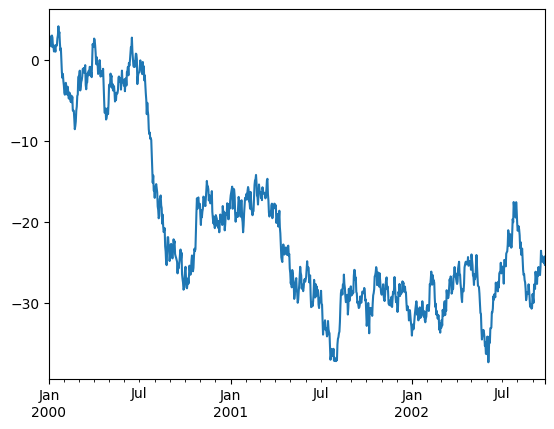

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,0.605942,-0.783072,-0.508893,-1.155277
2000-01-02,0.682555,1.140110,-0.531639,0.726366
2000-01-03,1.516771,2.204067,-0.250194,0.390836
2000-01-04,0.141410,-0.220223,0.600933,-1.226219
2000-01-05,-0.585322,0.253923,0.365339,0.602774
...,...,...,...,...
2002-09-22,0.108989,0.122104,0.115851,1.381936
2002-09-23,0.085727,0.415478,-1.585399,-0.534199
2002-09-24,1.219896,0.303066,-0.788527,0.788175
2002-09-25,1.022896,0.175153,-0.789410,2.249206


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

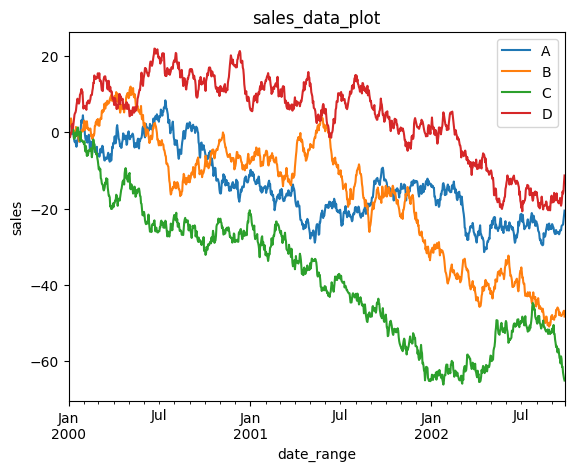

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Numpy Installation

In [56]:
pip install numpy==1.24.1


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Numpy Usage

## **Matplotlib**

[Back to contents](#table-of-contents)

### Matplotlib Installation

### Matplotlib Usage

## **Plotly**

[Back to contents](#table-of-contents)

### Plotly Installation

### Plotly Usage